# GSB 545: Advanced Machine Learning for Business Analytics

## Airline Passenger Satisfaction

### Primary Goals:
The dataset you'll be working with contains an airline passenger satisfaction survey. There are two primary questions of interest with this dataset:

1. Can you predict passenger satisfaction?
2. What factors are associated with passenger satisfaction?


In [2]:

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from numpy import mean,std
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.svm import LinearSVR,SVR
from sklearn.ensemble import BaggingRegressor, StackingClassifier, RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, mean_squared_error, r2_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector


## Data Preparation

In [3]:
data1 = pd.read_csv("Data/data1.csv")
data2 = pd.read_csv("Data/data2.csv")

In [4]:
data1.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [5]:
data2.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df = pd.concat([data1, data2])

In [7]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      129880 no

In [8]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [9]:
df.drop(columns="Unnamed: 0",inplace=True)

In [12]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [13]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

Arrival Delay in Minutes has 393 Missing values

In [10]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mode()[0], inplace=True)
# Fill the NaNs with 0

<positron-console-cell-10>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [15]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [11]:
df["satisfaction"].value_counts()


satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64

In [12]:
# Find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)


There are 5 categorical variables

The categorical variables are :

 ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
There are 5 categorical variables

The categorical variables are :

 ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


## Data Exploration/Wraggling

### Summary of categorical variables

There are 5 categorical variables in the dataset.

The categorical variables are given by Gender, Customer Type, Type of Travel, Class, Satisfaction

Satisfaction is the target variable.

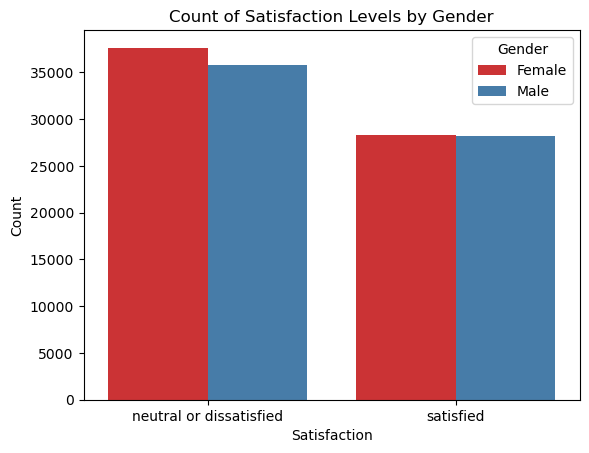

In [28]:
# Step 1: Group and count
grouped = df.groupby(["satisfaction", "Gender"]).size().reset_index(name="count")

# Step 2: Plot with barplot
sns.barplot(data=grouped, x="satisfaction", y="count", hue="Gender", palette="Set1")
plt.title("Count of Satisfaction Levels by Gender")
plt.ylabel("Count")
plt.xlabel("Satisfaction")
plt.show()


Looking at this bar chart, it seems that men and women tend to be very equally saisfied and neueral or dissatisfied. 

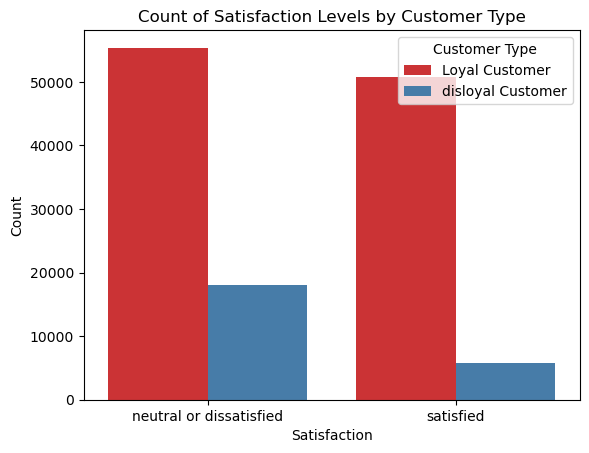

In [44]:
# Step 1: Group and count
grouped = df.groupby(["satisfaction", "Customer Type"]).size().reset_index(name="count")

# Step 2: Plot with barplot
sns.barplot(data=grouped, x="satisfaction", y="count", hue="Customer Type", palette="Set1")
plt.title("Count of Satisfaction Levels by Customer Type")
plt.ylabel("Count")
plt.xlabel("Satisfaction")
plt.show()

There are a lot more loyal customers in this dataset. This is likely because they are more willing to fill out surveys for the airline. Loyal customers are more evenly satisfied and neutral or dissatisfied with the airline. Whereas, there are a lot more neutral or dissatisfied, disloyal customers than satisfied ones. 

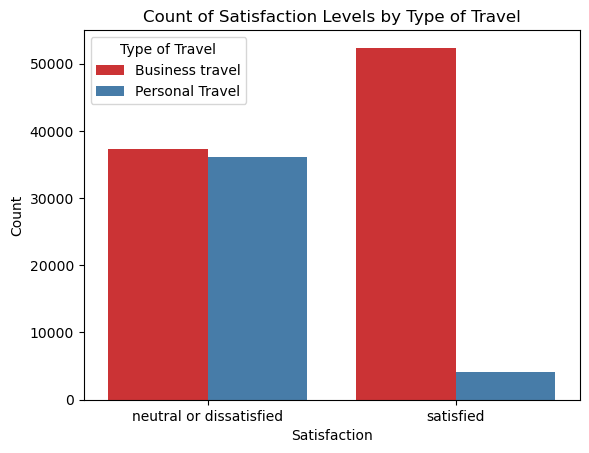

In [43]:
# Step 1: Group and count
grouped = df.groupby(["satisfaction", "Type of Travel"]).size().reset_index(name="count")

# Step 2: Plot with barplot
sns.barplot(data=grouped, x="satisfaction", y="count", hue="Type of Travel", palette="Set1")
plt.title("Count of Satisfaction Levels by Type of Travel")
plt.ylabel("Count")
plt.xlabel("Satisfaction")
plt.show()

This next graph is displaying satisfaction levels by type of travel. Majority of the satisifed customers are business travel. Most personal travel customers are neutral or dissatisfied with this airline. 

<positron-console-cell-22>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



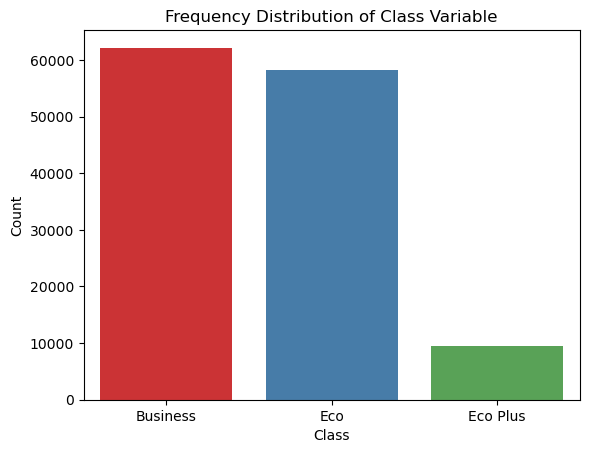

In [22]:
# Step 1: Group and count
grouped = df.groupby("Class").size().reset_index(name="count")

# Step 2: Plot with barplot
sns.barplot(data=grouped, x="Class", y="count", palette="Set1")
plt.title("Frequency Distribution of Class Variable")
plt.ylabel("Count")
plt.xlabel("Class")
plt.show()

This chart shows that Business and Economy classes make up the majority of passengers, with Business class having a slightly higher count. Eco Plus class is significantly less represented in the dataset, suggesting fewer passengers choose or are assigned to this travel class.

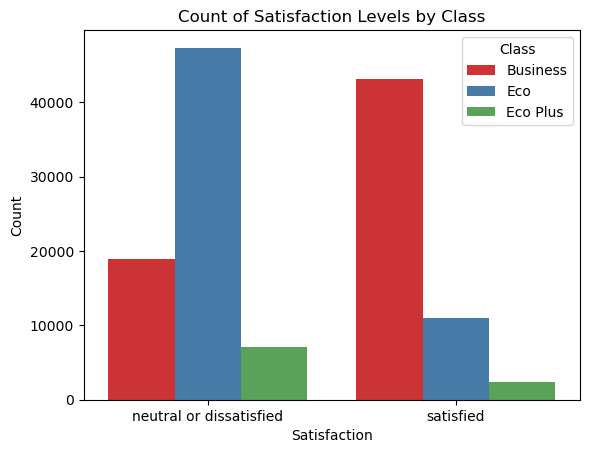

In [42]:
# Step 1: Group and count
grouped = df.groupby(["satisfaction", "Class"]).size().reset_index(name="count")

# Step 2: Plot with barplot
sns.barplot(data=grouped, x="satisfaction", y="count", hue="Class", palette="Set1")
plt.title("Count of Satisfaction Levels by Class")
plt.ylabel("Count")
plt.xlabel("Satisfaction")
plt.show()

This chart shows that Business class passengers are much more likely to report being satisfied, while Economy class passengers are far more likely to be neutral or dissatisfied. The Eco Plus group is consistently smaller, but also leans slightly more toward dissatisfaction than satisfaction.

In [46]:
# Explore Numerical Variables 
# Find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 19 numerical variables

The numerical variables are :

 ['id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
There are 19 numerical variables

The numerical variables are :

 ['id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [51]:
df[numerical].info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 103903
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Age                                129880 non-null  int64  
 2   Flight Distance                    129880 non-null  int64  
 3   Inflight wifi service              129880 non-null  int64  
 4   Departure/Arrival time convenient  129880 non-null  int64  
 5   Ease of Online booking             129880 non-null  int64  
 6   Gate location                      129880 non-null  int64  
 7   Food and drink                     129880 non-null  int64  
 8   Online boarding                    129880 non-null  int64  
 9   Seat comfort                       129880 non-null  int64  
 10  Inflight entertainment             129880 non-null  int64  
 11  On-board service                   129880 no

### Summary of numerical variables

There are 19 numerical variables.

These are given by id, Age, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes

All of the numerical variables are discrete, but the Arrival Delay in Minutes is a float type.

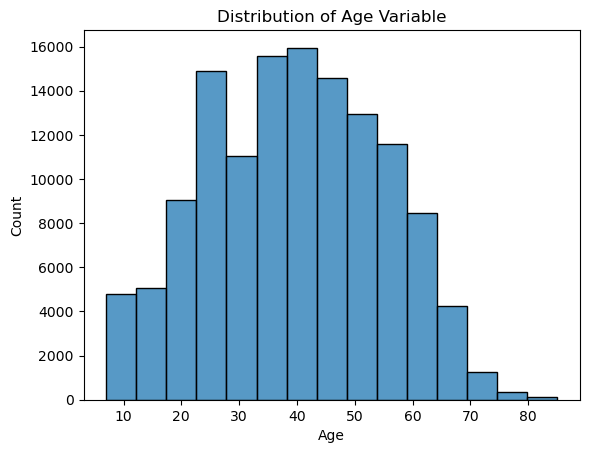

In [60]:
sns.histplot(data=df, x="Age", bins=15)
plt.title("Distribution of Age Variable")
plt.ylabel("Count")
plt.xlabel("Age")
plt.show()

This histogram shows that most airline passengers fall within the 25 to 55 age range, with a peak around age 40. The distribution is right-skewed, with fewer very young and older passengers represented in the dataset.

<positron-console-cell-62>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



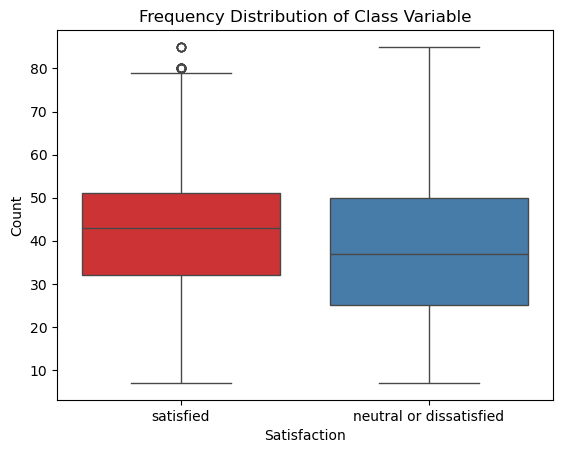

In [62]:

sns.boxplot(data=df, x="satisfaction", y="Age", palette="Set1")
plt.title("Visualize Satisfaction with Age Variable")
plt.ylabel("Count")
plt.xlabel("Satisfaction")
plt.show()

This boxplot shows that satisfied passengers tend to be slightly older on average than those who are neutral or dissatisfied. However, both groups have similar overall age distributions, with a wide range and some older outliers among the satisfied group.


## Data Preprocessing 

In [13]:
X = df.drop(['satisfaction','id'], axis=1)
y = df['satisfaction']

# Encode the target variable
y = LabelEncoder().fit_transform(y)

# Split data into separate training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for categorical and numerical columns
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first"), make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder="passthrough"
).set_output(transform="pandas")

## Data Modeling

### Random Forest Model

- Random Forest model with default paramrter setting resulted in Recall rate: 94.01% and Total Accurary rate: 96.31%.
- Below is also the confusion Matrix results.

In [15]:
rf_pipeline = Pipeline(
  [("preprocessing", ct),
   ("rf", RandomForestClassifier())]
).set_output(transform="pandas")

rf_model = rf_pipeline.fit(X_train, y_train)

# Evaluate the performance of the stacking model on the test data
y_pred = rf_model.predict(X_test)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Recall: 0.940135207258495
Confusion Matrix:
[[14448   286]
 [  673 10569]]
Accuracy: 0.9630813058207576
Recall: 0.940135207258495
Confusion Matrix:
[[14448   286]
 [  673 10569]]
Accuracy: 0.9630813058207576


### Plotting Feature Importance

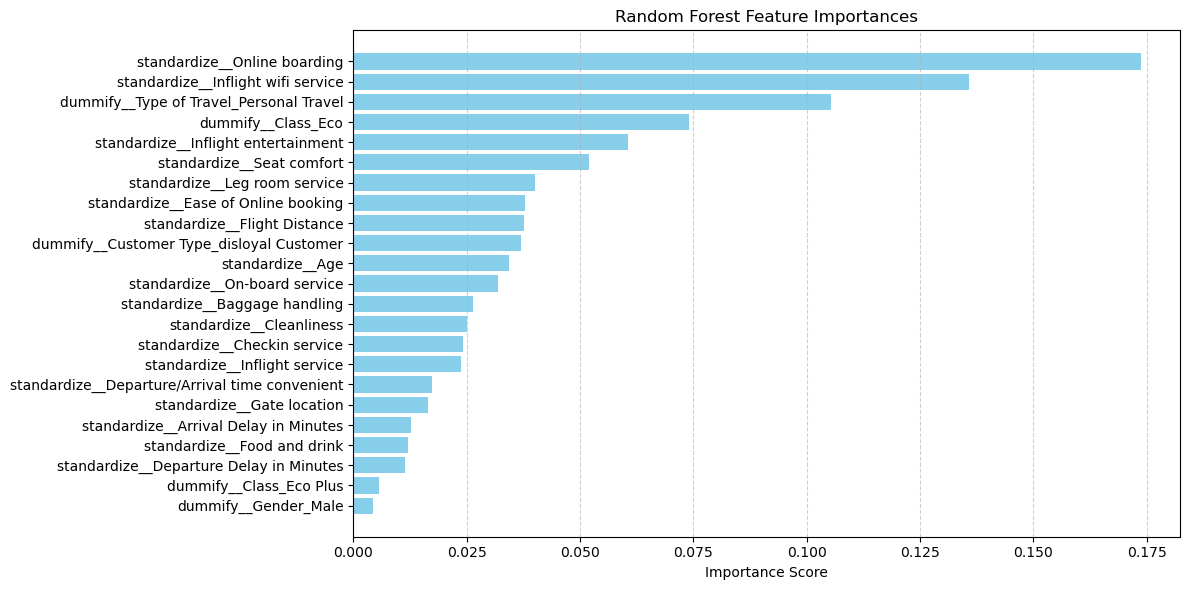

In [81]:
# Get the trained RandomForestClassifier
rf = rf_model.named_steps["rf"]

# Get feature importances
importances = rf.feature_importances_

# Get feature names after preprocessing
preprocessor = rf_model.named_steps["preprocessing"]
feature_names = preprocessor.get_feature_names_out()

# Create DataFrame
df_importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)


plt.figure(figsize=(12, 6))
plt.barh(df_importances["Feature"], df_importances["Importance"], color="skyblue")
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Random Forest Feature Importances")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


This graph shows the most important features used by the Random Forest model to predict whether a customer is satisfied or not. We can see that "Online boarding", "Inflight wifi service", and "Type of Travel" have the biggest influence on a customer's satisfaction. Features like "Gender", "Class_Eco Plus", and "Departure Delay in Minutes" had relatively low influence on the model’s predictions.

### Tuning Random Forest Model

Several hyper-parameters tuning were tried involving to enhance the overal model performance.

- Below are the main effective parameters tuning based on the tried tuning set to enhance the accurary rate

    - n_estimators: More trees generally improve performance but also increase training time.

    - max_depth: Limits how deep trees can grow. Shallow trees are fast and may prevent overfitting; deeper trees capture more detail but can overfit.

    - min_samples_split: Higher values make the model more conservative by requiring more data to split, which can reduce overfitting.

    - min_samples_leaf: Forces leaves to represent more observations, which smooths the model and helps avoid overfitting on noisy data. 



In [85]:
# define hyperparameters grid
param_grid = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [3, 5, 7],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# perform grid search
grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, cv=3, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

# print the best parameters found
print("Best Parameters: ", grid_result.best_params_)

# use the best model for predictions
best_model = grid_result.best_estimator_
predictions = best_model.predict(X_test)


Best Parameters:  {'rf__max_depth': 7, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 10, 'rf__n_estimators': 50}
Best Parameters:  {'rf__max_depth': 7, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 10, 'rf__n_estimators': 50}


Best Parameters: 'rf__max_depth': 7, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 10, 'rf__n_estimators': 50

In [86]:
rf_pipeline = Pipeline(
  [("preprocessing", ct),
   ("rf", RandomForestClassifier(max_depth = 7, min_samples_leaf= 2,min_samples_split = 10, n_estimators=50 ))]
).set_output(transform="pandas")

rf_model = rf_pipeline.fit(X_train, y_train)

# Evaluate the performance of the stacking model on the test data
y_pred = rf_model.predict(X_test)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Recall: 0.9083792919409358
Confusion Matrix:
[[13972   762]
 [ 1030 10212]]
Accuracy: 0.9310132429935325
Recall: 0.9083792919409358
Confusion Matrix:
[[13972   762]
 [ 1030 10212]]
Accuracy: 0.9310132429935325


The tuned Random Forest model resulted in Recall rate: 90.84% and Total Accurary rate: 93.10%. The tuned model performed worse than the default model. I tried to make the parameter grid larger but it was taking a really long time to load. 

### XGBoosting Model

- XGBoost mode with default paramrter setting result in Recall rate: 94.28% and Total Accurary rate: 96.35%.
- Below is also the confusion Matrix results.

In [26]:
# XGBoosting pipeline
xgboost_pipeline = Pipeline(
  [("preprocessing", ct),
   ("xgb", XGBClassifier())]
).set_output(transform="pandas")

xgboost_model = xgboost_pipeline.fit(X_train, y_train)
y_pred = xgboost_model.predict(X_test)

# Evaluate the performance of the stacking model on the test data
y_pred = xgboost_model.predict(X_test)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Recall: 0.9428037715708949
Confusion Matrix:
[[14429   305]
 [  643 10599]]
Accuracy: 0.9635047736372035
Recall: 0.9428037715708949
Confusion Matrix:
[[14429   305]
 [  643 10599]]
Accuracy: 0.9635047736372035


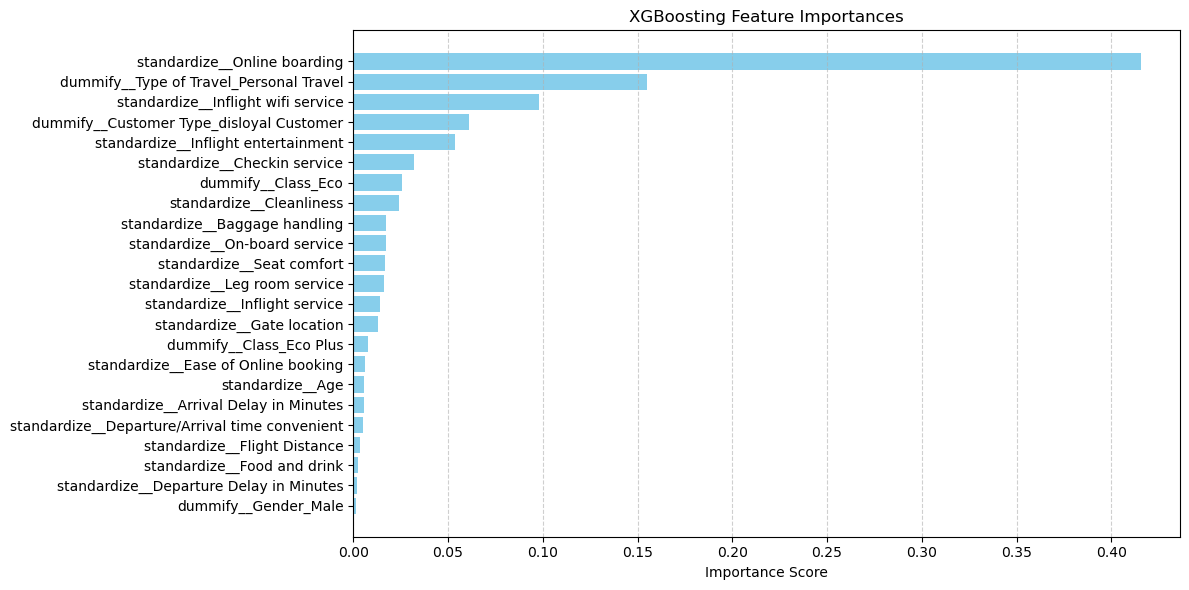

In [28]:
# Get the trained XGBoosting
xgb = xgboost_model.named_steps["xgb"]

# Get feature importances
importances = xgb.feature_importances_

# Get feature names after preprocessing
preprocessor = xgboost_model.named_steps["preprocessing"]

feature_names = preprocessor.get_feature_names_out()

# Create DataFrame
df_importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)


plt.figure(figsize=(12, 6))
plt.barh(df_importances["Feature"], df_importances["Importance"], color="skyblue")
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("XGBoosting Feature Importances")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


This XGBoost feature importance plot shows that online boarding experience is by far the strongest predictor of customer satisfaction, followed by type of travel and inflight Wi-Fi service. Features like gender, departure delay, and food and drink have minimal impact, suggesting that the digital and service experience matters more than demographics or flight timing delays in shaping passenger satisfaction.

### Tuning XGBoost Model

Several hyper-parameters tuning were tried involving to enhance the overal model performance.

- Below are the main effective parameters tuning based on the tried tuning set to enhance the accurary rate

    - learning_rate: Smaller values (like 0.01) make learning more gradual and often improve generalization, but require more trees. Larger values speed up learning but may overshoot optimal solutions.

    - n_estimators: More trees can improve performance but increase training time and risk of overfitting if too high.

    - max_depth: Deeper trees model more complexity but can overfit. Shallower trees are faster and may generalize better.

    - scale_pos_weight: Values >1 give more weight to the positive class, helping the model focus on correctly predicting the minority class.



In [24]:
# define hyperparameters grid
param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__scale_pos_weight': [1, 3, 5]
}

# perform grid search
grid_search = GridSearchCV(estimator=xgboost_pipeline, param_grid=param_grid, cv=3, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

# print the best parameters found
print("Best Parameters: ", grid_result.best_params_)

# use the best model for predictions
best_model = grid_result.best_estimator_
predictions = best_model.predict(X_test)


Best Parameters:  {'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 200, 'xgb__scale_pos_weight': 1}
Best Parameters:  {'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 200, 'xgb__scale_pos_weight': 1}


Best Parameters:  'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 200, 'xgb__scale_pos_weight': 1


In [25]:
rf_pipeline = Pipeline(
  [("preprocessing", ct),
   ("xgb", XGBClassifier(learning_rate = 0.1, max_depth= 7, n_estimators= 200, scale_pos_weight=1))]
).set_output(transform="pandas")

rf_model = rf_pipeline.fit(X_train, y_train)

# Evaluate the performance of the stacking model on the test data
y_pred = rf_model.predict(X_test)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Recall: 0.9443159580145881
Confusion Matrix:
[[14451   283]
 [  626 10616]]
Accuracy: 0.9650061595318756
Recall: 0.9443159580145881
Confusion Matrix:
[[14451   283]
 [  626 10616]]
Accuracy: 0.9650061595318756


The best tuned XGBoost model result in Recall rate: 94.43% and Total Accurary rate: 96.50%. The tuned model outperforms the default model slightly on both accuracy and recall. These improvements suggest that hyperparameter tuning helped the model better capture patterns in the data and reduce misclassifications.

## Interpretation & Conclusions
The most important factors driving passenger satisfaction were the online boarding experience, type of travel, and inflight Wi-Fi service. Passengers who reported a smoother online boarding process and better Wi-Fi access were much more likely to be satisfied.

Business travelers were significantly more likely to be satisfied compared to personal travelers, suggesting that business-class service features are better aligned with expectations. Overall, digital convenience and onboard service quality mattered more than delays or demographic factors, highlighting the importance of a smooth, connected travel experience.

## Dataset Critiques 

There are several potential sources of bias in this dataset. First, the satisfaction ratings are subjective because the responses may vary based on individual expectations or mood rather than consistent service experiences. Also, passengers who felt strongly—either very satisfied or very dissatisfied—may have been more likely to respond, introducing response bias.

Since most variables are on a scale of 1-5, interpretation can vary from person to person. This can reduce the precision of the data. A better survey design could include behavioral data like check-in time, seat upgrades, complaint records, and more contextual questions that clarify why a service was rated a certain way. This would make the results more objective and actionable for airlines.

Additionally, I found earlier that major of the customers in this dataset are 'loyal customers' which might also have bias on the results. Because they believe they are personally tied to this airline and their results might reflect this. 




## Business Implications

The results of this analysis offer clear business value for this airline. Improving online boarding processes, inflight Wi-Fi, and other digital touchpoints could significantly boost passenger satisfaction. Since business travelers report higher satisfaction, tailoring services and loyalty programs toward them may increase retention and revenue.

I believe that these results can be generalized to airline passengers on similar commercial carriers. The findings are most relevant to airlines that use digital platforms for booking and boarding, and offer tiered service classes.

For an airline, this analysis is highly useful. It reveals which aspects of the customer experience most influence satisfaction, allowing the airline to prioritize improvements that matter most, as long as they are aware of the potential bias in the data.